In [2]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import os
import scipy
import numpy as np
import seaborn as sns
from functools import reduce

from auditory_cortex.plotters import tikzplots
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.plotters.plotter_utils import PlotterUtils

import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
%matplotlib inline


INFO:Please install tensorboardX: pip install tensorboardX

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


/bin/sh: line 1: sox: command not found
/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


In [30]:
from auditory_cortex import results_dir
results_dir

'/depot/jgmakin/data/auditory_cortex/results/'

### random linear projections

Plotting trained and shuffled distributions for whisper_tiny
Extracting column: normalized_test_cc
Filtering 'normalizer' using multiple of 0.300 with std dev ...
Number of channels returned: (498,)
Extracting column: normalized_test_cc
Filtering 'normalizer' using multiple of 0.300 with std dev ...
Peak corr (median): 0.5080787616539588, occurs at x_coordinate: 4
Peak corr (max): 0.9260937429247744, occurs at x_coordinate: 2
Peak corr (median): 0.5243391870583959, occurs at x_coordinate: 1
Peak corr (max): 1.3606717522361382, occurs at x_coordinate: 1
p-value for 0: 3.9536671874844157e-07
p-value for 1: 1.0
p-value for 2: 3.0021812086284696e-23
p-value for 3: 7.775060064540459e-32
p-value for 4: 2.4327528636225134e-35
p-value for 5: 4.172971555327394e-42


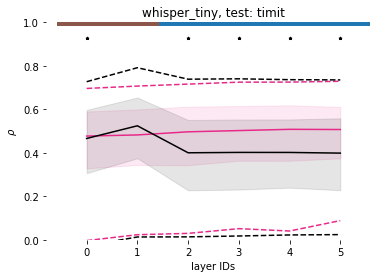

In [2]:
model_name = 'whisper_tiny'
trained_identifier = 'timit_trf_lags300_bw50_naplib_matched'
untrained_identifiers = [f'reset_{trained_identifier}']
tikz_indicator = 'trf'
baseline_identifier = f"STRF_freqs80_mel_{trained_identifier}"
trained_identifier = 'ucsf_timit_trf_lags300_bw50_random_proj'
bin_width = 50
area = 'all'
threshold = 0.3
mVocs = True if 'mVocs' in trained_identifier else False
normalized=True
save_tikz=False
dists = RegPlotter.plot_all_layers_trained_and_shuffled(
        model_name=model_name,
        bin_width=bin_width,
        area=area,
        normalized=normalized,
        threshold=threshold,
        mVocs=mVocs,
        save_tikz=save_tikz,
        trained_identifier=trained_identifier,
        untrained_identifiers=untrained_identifiers,
        baseline_identifier=baseline_identifier,
        )

In [4]:
trained_medians = [round(np.median(dist),3) for dist in dists[0].values()]
untrained_medians = [round(np.median(dist),3) for dist in dists[1].values()]
print(f"Trained medians: {trained_medians}")
print(f"Untrained medians: {untrained_medians}")

Trained medians: [0.477, 0.482, 0.497, 0.502, 0.508, 0.507]
Untrained medians: [0.466, 0.524, 0.4, 0.402, 0.402, 0.399]


### random conv layers

Plotting trained and shuffled distributions for whisper_tiny
Extracting column: normalized_test_cc
Filtering 'normalizer' using multiple of 0.300 with std dev ...
Number of channels returned: (498,)
Extracting column: normalized_test_cc
Filtering 'normalizer' using multiple of 0.300 with std dev ...
Peak corr (median): 0.5112371746355466, occurs at x_coordinate: 5
Peak corr (max): 0.9293739364701986, occurs at x_coordinate: 1
Peak corr (median): 0.5243391870583959, occurs at x_coordinate: 1
Peak corr (max): 1.3606717522361382, occurs at x_coordinate: 1
p-value for 0: 1.0796385424467754e-07
p-value for 1: 1.0
p-value for 2: 1.3206622401627286e-32
p-value for 3: 2.8197430331852675e-39
p-value for 4: 8.662864009198411e-46
p-value for 5: 3.34652063096176e-49


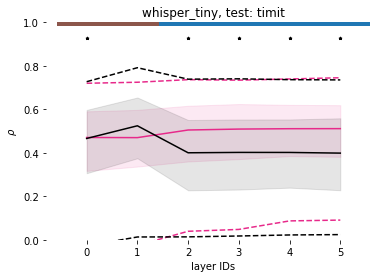

In [5]:
model_name = 'whisper_tiny'
bin_width = 50
area = 'all'
threshold = 0.3
mVocs = True if 'mVocs' in trained_identifier else False
normalized=True
save_tikz=False
trained_identifier = 'timit_trf_lags300_bw50_naplib_matched'
untrained_identifiers = [f'reset_{trained_identifier}']
tikz_indicator = 'trf'
baseline_identifier = f"STRF_freqs80_mel_{trained_identifier}"
trained_identifier = 'ucsf_timit_trf_lags300_bw50_random_conv'
dists = RegPlotter.plot_all_layers_trained_and_shuffled(
                model_name=model_name,
                bin_width=bin_width,
                area=area,
                normalized=normalized,
                threshold=threshold,
                mVocs=mVocs,
                save_tikz=save_tikz,
                trained_identifier=trained_identifier,
                untrained_identifiers=untrained_identifiers,
                baseline_identifier=baseline_identifier,
                )

In [6]:
trained_medians = [round(np.median(dist),3) for dist in dists[0].values()]
untrained_medians = [round(np.median(dist),3) for dist in dists[1].values()]
print(f"Trained medians: {trained_medians}")
print(f"Untrained medians: {untrained_medians}")

Trained medians: [0.471, 0.47, 0.505, 0.509, 0.511, 0.511]
Untrained medians: [0.466, 0.524, 0.4, 0.402, 0.402, 0.399]


### random conv GELU

INFO:Plotting trained and shuffled distributions for whisper_tiny
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.300 with std dev ...
INFO:Number of channels returned: (498,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.300 with std dev ...
INFO:Peak corr (median): 0.5454176503550063, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9951102695460958, occurs at x_coordinate: 4
INFO:Peak corr (median): 0.5243391870583959, occurs at x_coordinate: 1
INFO:Peak corr (max): 1.3606717522361382, occurs at x_coordinate: 1


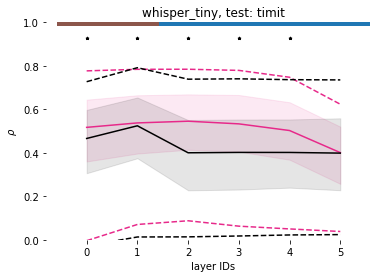

In [7]:
model_name = 'whisper_tiny'
bin_width = 50
area = 'all'
threshold = 0.3
normalized=True
save_tikz=False
trained_identifier = 'timit_trf_lags300_bw50_naplib_matched'
untrained_identifiers = [f'reset_{trained_identifier}']
tikz_indicator = 'trf'
baseline_identifier = f"STRF_freqs80_mel_{trained_identifier}"
trained_identifier = 'ucsf_timit_trf_lags300_bw50_random_conv_gelu'
mVocs = True if 'mVocs' in trained_identifier else False
dists = RegPlotter.plot_all_layers_trained_and_shuffled(
                model_name=model_name,
                bin_width=bin_width,
                area=area,
                normalized=normalized,
                threshold=threshold,
                mVocs=mVocs,
                save_tikz=save_tikz,
                trained_identifier=trained_identifier,
                untrained_identifiers=untrained_identifiers,
                baseline_identifier=baseline_identifier,
                )

### all linear projections

Identifier: timit_trf_lags300_bw50_naplib_matched
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5793349635051107, occurs at x_coordinate: 1
INFO:Peak corr (max): 1.3296977999683492, occurs at x_coordinate: 2
Identifier: reset_timit_trf_lags300_bw50_naplib_matched
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5459963485760408, occurs at x_coordinate: 1
INFO:Peak corr (max): 1.232099991047162, occurs at x_coordinate: 1
Identifier: ucsf_timit_trf_lags300_bw50_random_proj
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5295415678871297, occurs at x_coordinate: 4
INFO:Peak corr (max): 0.8429256667237373, occurs at x_coordinate: 5
Identifier: ucsf_timit_trf_lags300_bw50_random_conv
INFO:Extracting column: normalized_tes

(0.0, 1.0)

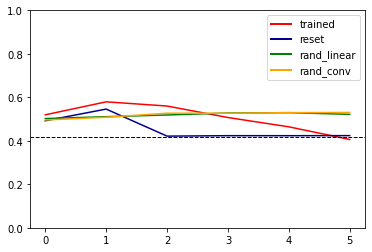

In [4]:
from matplotlib.lines import Line2D

model_name = 'whisper_tiny'
identifiers = {
    'trained': 'timit_trf_lags300_bw50_naplib_matched',
    'reset': 'reset_timit_trf_lags300_bw50_naplib_matched',
    # 'reset_1': 'ucsf_reset_timit_trf_lags300_bw50_naplib_matched_1',
    # 'reset_2': 'ucsf_reset_timit_trf_lags300_bw50_naplib_matched_2',
    # 'reset_3': 'ucsf_reset_timit_trf_lags300_bw50_naplib_matched_3',
    'rand_linear': 'ucsf_timit_trf_lags300_bw50_random_proj',
    'rand_conv': 'ucsf_timit_trf_lags300_bw50_random_conv',
    # 'rand_conv_gelu': 'ucsf_timit_trf_lags300_bw50_random_conv_gelu',
    
}
blues = ['#00008B', '#003366', '#4682B4', '#87CEEB', '#ADD8E6']
colors = {
    'trained': 'red', 'rand_linear': 'green', 'rand_conv': 'orange',
    'rand_conv_gelu': 'purple', 'reset': blues[0], 'reset_1': blues[1], 
    'reset_2': blues[2], 'reset_3': blues[3], 
}
area = 'all'
bin_width = 50
delay = 0
threshold = 0.5
mVocs = False
normalized=True
save_tikz=False
# colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'gray', 'black']
ax = None
alpha = 0.1
legends = []
display_inter_quartile_range = False
for idx, (label, iden) in enumerate(identifiers.items()):
    print(f"Identifier: {iden}")
    color = colors[label]
    corr_obj = Correlations(model_name+'_'+iden)
    data_dist = corr_obj.get_corr_all_layers_for_bin_width(
                    neural_area=area, bin_width=bin_width, delay=delay,
                    threshold=threshold, normalized=normalized,
                    mVocs=mVocs, 
                )
    # plotting individual distributions...
    ax=RegPlotter.plot_line_with_shaded_region(
        data_dict=data_dist, color=color, alpha=alpha, ax=ax,
        display_inter_quartile_range=display_inter_quartile_range,
        display_dotted_lines=False,
        )

    legends.append(
        Line2D([0], [0], color=color, lw=2, label=label,),
    )

plt.axhline(0.4167, color='black', lw=1, ls='--')
plt.legend(handles=legends)
ax.set_ylim(0.0, 1.0)
# ax.set_xlim(0.0, 8)

Identifier: timit_trf_lags300_bw50_naplib_matched
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Peak corr (median): 0.5994906353516909, occurs at x_coordinate: 1
INFO:Peak corr (max): 1.0445834885727974, occurs at x_coordinate: 1
Identifier: reset_timit_trf_lags300_bw50_naplib_matched
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Peak corr (median): 0.5634217203390322, occurs at x_coordinate: 1
INFO:Peak corr (max): 1.0005916242681347, occurs at x_coordinate: 1
Identifier: ucsf_reset_timit_trf_lags300_bw50_naplib_matched_1
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 1.000 with std dev ...
INFO:Peak corr (median): 0.5749627037234071, occurs at x_coordinate: 1
INFO:Peak corr (max): 0.9001510909400163, occurs at x_coordinate: 4
Identifier: ucsf_reset_timit_trf_lags300_bw50_naplib_matched_2
INFO:Extracting

(0.0, 8.0)

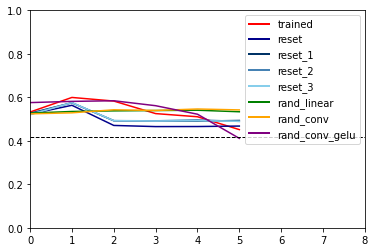

In [20]:
from matplotlib.lines import Line2D

model_name = 'whisper_tiny'
identifiers = {
    'trained': 'timit_trf_lags300_bw50_naplib_matched',
    'reset': 'reset_timit_trf_lags300_bw50_naplib_matched',
    'reset_1': 'ucsf_reset_timit_trf_lags300_bw50_naplib_matched_1',
    'reset_2': 'ucsf_reset_timit_trf_lags300_bw50_naplib_matched_2',
    'reset_3': 'ucsf_reset_timit_trf_lags300_bw50_naplib_matched_3',
    'rand_linear': 'ucsf_timit_trf_lags300_bw50_random_proj',
    'rand_conv': 'ucsf_timit_trf_lags300_bw50_random_conv',
    'rand_conv_gelu': 'ucsf_timit_trf_lags300_bw50_random_conv_gelu',
    
}
blues = ['#00008B', '#003366', '#4682B4', '#87CEEB', '#ADD8E6']
colors = {
    'trained': 'red', 'rand_linear': 'green', 'rand_conv': 'orange',
    'rand_conv_gelu': 'purple', 'reset': blues[0], 'reset_1': blues[1], 
    'reset_2': blues[2], 'reset_3': blues[3], 
}
area = 'all'
bin_width = 50
delay = 0
threshold = 1.0
mVocs = False
normalized=True
save_tikz=False
# colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'gray', 'black']
ax = None
alpha = 0.1
legends = []
display_inter_quartile_range = False
for idx, (label, iden) in enumerate(identifiers.items()):
    print(f"Identifier: {iden}")
    color = colors[label]
    corr_obj = Correlations(model_name+'_'+iden)
    data_dist = corr_obj.get_corr_all_layers_for_bin_width(
                    neural_area=area, bin_width=bin_width, delay=delay,
                    threshold=threshold, normalized=normalized,
                    mVocs=mVocs, 
                )
    # plotting individual distributions...
    ax=RegPlotter.plot_line_with_shaded_region(
        data_dict=data_dist, color=color, alpha=alpha, ax=ax,
        display_inter_quartile_range=display_inter_quartile_range,
        display_dotted_lines=False,
        )

    legends.append(
        Line2D([0], [0], color=color, lw=2, label=label,),
    )

plt.axhline(0.4167, color='black', lw=1, ls='--')
plt.legend(handles=legends)
ax.set_ylim(0.0, 1.0)
ax.set_xlim(0.0, 8)

### setting up...

In [27]:
import numpy as np
import torch
from scipy.signal import resample
import torch.nn as nn
from collections import OrderedDict
from auditory_cortex.neural_data import create_neural_dataset
from auditory_cortex.dnn_feature_extractor import create_feature_extractor
from auditory_cortex.dataloader2 import DataLoader

from auditory_cortex.data_assembler import RandProjAssembler, STRFDataAssembler

In [28]:
model_name = 'whisper_tiny'
shuffled = False
dataset_name = 'ucsf'
session = 200206

In [29]:
feature_extractor = create_feature_extractor(model_name, shuffled=shuffled)
dataset_obj = create_neural_dataset(dataset_name, session)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


INFO:NeuralData:  Creating object for session: 200206 ... 
INFO:Done.


In [7]:
torch.manual_seed(42)

layer_id = 0
bin_width = 50
mVocs = False
dataset = RandProjAssembler(
        dataset_obj, feature_extractor, layer_id, bin_width=bin_width, mVocs=mVocs,
        conv_layers=False, non_linearity=False
        )

INFO:creating Dataset for timit data.
INFO:Reading features for model: whisper_tiny
INFO:Resamping ANN features at bin-width: 50
INFO:Loading data for session at bin_width-50ms.


In [8]:
dataset.linear_stack

Sequential(
  (rand_linear_0): Linear(in_features=80, out_features=384, bias=True)
)

In [9]:
sampling_rate = dataset.dataloader.get_sampling_rate(mVocs=dataset.mVocs)
        
all_stim_ids = np.concatenate([dataset.training_stim_ids, dataset.testing_stim_ids])
features = {}
        

In [10]:
stim_id = all_stim_ids[0]
aud = dataset.dataloader.get_stim_audio(stim_id, mVocs=dataset.mVocs)
num_bins = dataset.dataloader.get_num_bins(stim_id, bin_width=dataset.bin_width, mVocs=dataset.mVocs)
spect = dataset.get_spectrogram(aud, sampling_rate)

In [19]:
dataset.bin_width

50

In [11]:
spect.shape

(181, 80)

In [12]:
num_bins

36

In [13]:
import torch
with torch.no_grad():
    spect = torch.from_numpy(spect).to(dataset.device)
    feats = dataset.linear_stack(spect).cpu().numpy()

In [14]:
feats.shape

(181, 384)

In [15]:
if dataset.conv_layers:
    feats = feats.squeeze().transpose() # (t, num_freqs)

In [16]:
feats.shape

(181, 384)

In [17]:
features[stim_id] = resample(feats, num_bins, axis=0)   # (t, num_freqs)

In [18]:
features[stim_id].shape

(36, 384)

In [6]:
dataset.data_cache['features'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 22

In [7]:
dataset.data_cache['features'][1].shape

(36, 384)

In [8]:
dataset.data_cache['training_spikes'][1][1].shape

(1, 36)

In [25]:
dataset.data_cache['testing_spikes'][12].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [23]:
dataset.data_cache.keys()

dict_keys(['features', 'training_spikes', 'testing_spikes'])

In [19]:
dataset.data_cache['training_spikes'][1][0].shape

(1, 36)

In [5]:
a = np.random.randn(4, 1000)
a.transpose().shape

(1000, 4)

In [8]:
np.expand_dims(a, axis=0).shape

(1, 4, 1000)

In [7]:
dataloader = DataLoader(dataset_obj, feature_extractor)

In [16]:
test_aud = np.random.randn(1, 16000)
spect = dataloader.feature_extractor.process_input(test_aud)
spect_dims = spect.shape[1]

In [19]:
spect[0]

tensor([[0.7887, 1.0917, 1.2110,  ..., 1.1432, 1.0428, 1.0067],
        [0.8875, 1.1419, 1.2149,  ..., 1.1542, 1.0260, 1.2088],
        [1.1442, 1.2387, 1.1834,  ..., 1.1389, 1.0771, 1.1856],
        ...,
        [1.0857, 1.1917, 1.1705,  ..., 1.0639, 1.1124, 1.1534],
        [1.0250, 1.1663, 1.1555,  ..., 1.1534, 1.1482, 1.1632],
        [1.0900, 1.1001, 1.0687,  ..., 1.1596, 1.1015, 1.1462]])

In [20]:
out = resample(spect[0], 50, axis=1)

In [21]:
out

array([[0.8786483, 1.1998795, 1.0743364, ..., 1.0100435, 1.0752099,
        1.0917673],
       [1.0370783, 1.1682376, 1.1212031, ..., 1.0672693, 1.1874471,
        1.1045382],
       [1.2088573, 1.1424588, 1.1507007, ..., 1.1684867, 1.1594061,
        1.0938338],
       ...,
       [1.1452688, 1.1707325, 1.1120845, ..., 1.1204675, 1.1089002,
        1.0935537],
       [1.0984689, 1.1474259, 1.1389393, ..., 1.1089834, 1.1233714,
        1.1545224],
       [1.098413 , 1.0879328, 1.1447287, ..., 1.1221571, 1.1154056,
        1.1413833]], dtype=float32)

In [22]:
aud = np.random.randn(16000)
spect = dataloader.feature_extractor.process_input(aud)

In [28]:
assert aud.ndim == 1, "Spectrogram should be 1D"

In [23]:
spect.shape

torch.Size([1, 80, 100])

In [30]:
dataloader.device()

AttributeError: 'DataLoader' object has no attribute 'device'

In [4]:
bin_width = 50
mVocs = False
all_layer_features = dataloader.get_resampled_DNN_features(bin_width=bin_width, mVocs=mVocs)

INFO:auditory_cortex.io_utils.io:Reading features for model: whisper_tiny
INFO:auditory_cortex.dataloader2:Resamping ANN features at bin-width: 50


In [ ]:
layer_id = 0
all_layer_features[layer_id][1].shape

(36, 384)

In [9]:
layer_id = 1
all_layer_features[layer_id][1].shape

(36, 384)

In [ ]:
layer_id = 0
spect_dims = 80
feature_dims = {}
for lid in range(layer_id,-1,-1):
    print(lid)
    feature_dims[lid] = all_layer_features[lid][1].shape[1]
feature_dims[-1] = spect_dims

0


In [31]:
feature_dims

{0: 384, -1: 80}

In [ ]:

linear_proj_layers = []
for lid in range(layer_id+1):
    linear_proj_layers.append(
        nn.Linear(feature_dims[lid-1], feature_dims[lid])
    )
linear_stack = nn.Sequential(*linear_proj_layers)



In [43]:
linear_stack

Sequential(
  (0): Linear(in_features=80, out_features=384, bias=True)
)

In [44]:
random_input = torch.randn(1, 80)
out = linear_stack(random_input)

In [45]:
out.shape

torch.Size([1, 384])

In [ ]:
self.processor = AutoProcessor.from_pretrained(repo_name, cache_dir=HF_CACHE_DIR)

In [36]:
OrderedDict({0:1, 1:2})

OrderedDict([(0, 1), (1, 2)])

In [ ]:
layer_id = 0


0


In [20]:
feature_dims

{3: 384, 2: 384, 1: 384, 0: 384}

In [ ]:
layer_features = all_layer_features[layer_id]

KeyError: 6